In [ ]:
#Stable Diffusion kurulumları
!pip install diffusers transformers accelerate scipy safetensors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#üretilen resimleri görüntülemek için
from PIL import Image

In [ ]:
#Stable Diffusion 2-1-base   https://huggingface.co/stabilityai/stable-diffusion-2-1-base
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
model_id1 = "stabilityai/stable-diffusion-2-1-base"
scheduler1 = EulerDiscreteScheduler.from_pretrained(model_id1, subfolder="scheduler")
pipe1 = StableDiffusionPipeline.from_pretrained(model_id1, scheduler=scheduler1, torch_dtype=torch.float16)
pipe1 = pipe1.to("cuda")

enter an english prompt:children having a picnic


  0%|          | 0/50 [00:00<?, ?it/s]

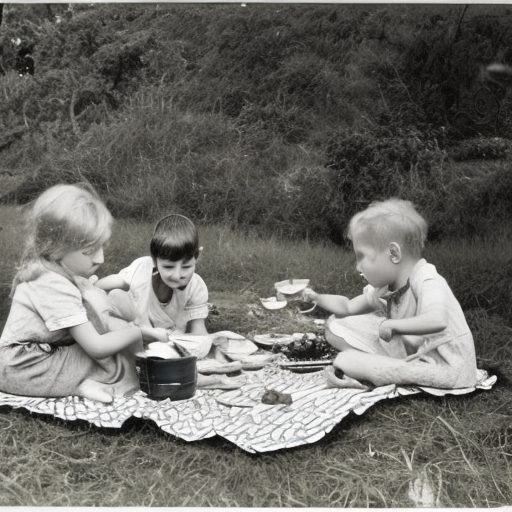

In [ ]:
# Prompt samples:  a photo of an astronaut riding a horse on mars  |  where butterflies fly, there are waterfalls, gazelles drink water | Steampunk airship bursting through the clouds, cyberpunk art
prompt1 = input("enter an english prompt:") #piplena açıklama (prompt) göndermek için.
image1 = pipe1(prompt1).images[0]  #üretilen resimlerden ilkini aldım.
image1.save("sdimg.png")
#resmi görüntüle
im1 = Image.open(r"/content/sdimg.png") # r kullandım, / özel karakter işaretlerini devre dışı bırakmak için
im1.show()

In [ ]:
#Openjourney is an open source Stable Diffusion fine tuned model on Midjourney images   https://huggingface.co/prompthero/openjourney
from diffusers import StableDiffusionPipeline
import torch
model_id2 = "prompthero/openjourney"
pipe2 = StableDiffusionPipeline.from_pretrained(model_id2, torch_dtype=torch.float16)
pipe2 = pipe2.to("cuda")

ModuleNotFoundError: ignored

enter an english prompt: a photo of an astronaut riding a horse on mars


  0%|          | 0/50 [00:00<?, ?it/s]

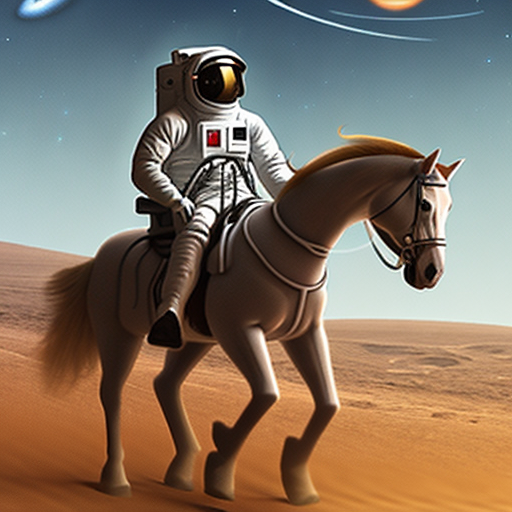

In [ ]:
# Prompt samples:  a photo of an astronaut riding a horse on mars  |  Towers, people and flying cars in Trabzon in 2040
prompt = input("enter an english prompt:")
image2 = pipe2(prompt).images[0]
image2.save("ojimg.png")
im2 = Image.open(r"/content/ojimg.png")
im2.show()

In [ ]:
#translator kurulumu
!pip install deep_translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
translator = GoogleTranslator(source='auto', target='en')

In [ ]:

promptnew=translator.translate(input("bir açıklama giriniz:"))
print(promptnew)

bir açıklama giriniz:istanbul' da uçan bir inek
a flying cow in istanbul


  0%|          | 0/50 [00:00<?, ?it/s]

<====STABLE DIFFUSION====>


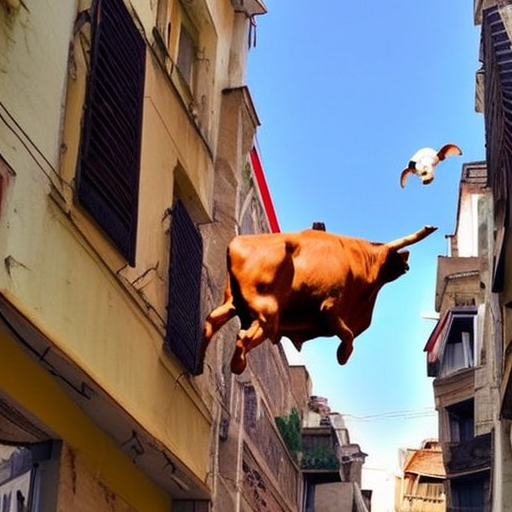

  0%|          | 0/50 [00:00<?, ?it/s]

<====OPEN JOURNEY====>


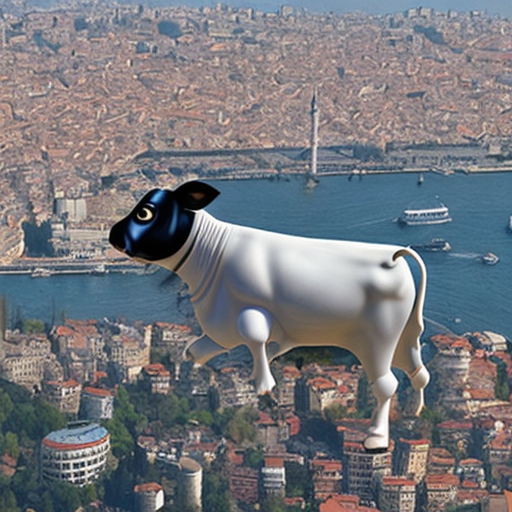

In [ ]:
#stable diffusion
image11 = pipe1(promptnew).images[0]
image11.save("img11.png")
im11 = Image.open(r"/content/img11.png")
print("<====STABLE DIFFUSION====>")
im11.show()
#open journey
image22 = pipe2(promptnew).images[0]
image22.save("img22.png")
im22 = Image.open(r"/content/img22.png")
print("<====OPEN JOURNEY====>")
im22.show()